## Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework
### José Carlos Sánchez Gómez A0174050
### 19 de agosto del 2024

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Separación de los datos en train y test, junto con la declaracion de las tetas y alpha

In [4]:
data = pd.read_csv("/content/Valhalla23.csv")
train_set, test_set = train_test_split(data, test_size=0.3)
theta_zero, theta_one = 1, 1
alpha = 0.000005
hipotesis = lambda theta_zero, theta_one, x : theta_zero + theta_one * x
n = len(train_set)

### Entrenamiento del modelo con 1000 iteraciones

In [5]:
celsius = train_set["Celsius"]
valks = train_set["Valks"]
for _ in range(1000):
  delta = [hipotesis(theta_zero, theta_one, celsius.iloc[i]) - valks.iloc[i] for i in range(len(celsius))]
  delta_x = [delta[i] * celsius.iloc[i] for i in range(len(celsius))]
  total_delta, total_delta_x = sum(delta) / n, sum(delta_x) / n
  theta_zero = theta_zero - alpha * total_delta
  theta_one = theta_one - alpha * total_delta_x

### Comparando los resultados de los modelos usando los datos de test, contra los valores originales

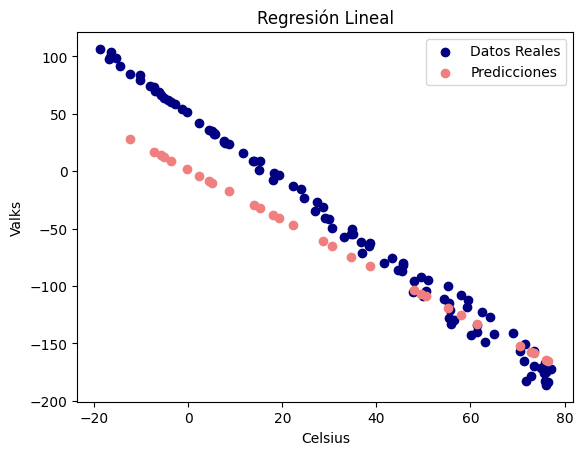

In [7]:
predicciones = [hipotesis(theta_zero, theta_one, test_set["Celsius"].iloc[i]) for i in range(len(test_set["Celsius"]))]
plt.scatter(data["Celsius"], data["Valks"], color="navy")
plt.scatter(test_set["Celsius"], predicciones, color="lightcoral")
plt.legend(["Datos Reales", "Predicciones"])
plt.xlabel("Celsius")
plt.ylabel("Valks")
plt.title("Regresión Lineal")
plt.show()

### Calculando la funcion de costo para el subconjunto de entrenamiento y prueba

In [24]:
test_mse = ((test_set["Valks"] - predicciones) ** 2).mean()
print("Error de entrenamiento:", test_mse)
train_values = [hipotesis(theta_zero, theta_one, train_set["Celsius"].iloc[i]) for i in range(len(train_set["Celsius"]))]
train_mse = ((train_set["Valks"] - train_values) ** 2).mean()

print("Error de prueba:", train_mse)

Error de entrenamiento: 1189.9574152143255
Error de prueba: 1062.5230781730345


In [34]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework.ipynb to html
[NbConvertApp] Writing 629706 bytes to /content/drive/MyDrive/ColabNotebooks/Implementación_de_una_técnica_de_aprendizaje_máquina_sin_el_uso_de_un_framework.html
